In [171]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
movies = pd.read_csv('tmdb-movie-metadata/tmdb_5000_movies.csv')
print(movies.shape)

(4803, 20)


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [4]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [5]:
import json

def to_str(column):
    return '|'.join([i["name"] for i in json.loads(column)])

def to_year(column):
    return pd.to_datetime(column, format='%Y-%M-%d').year

In [6]:
movies['genres'] = movies.genres.apply(to_str)
movies['keywords'] = movies.keywords.apply(to_str)
movies['production_companies'] = movies.production_companies.apply(to_str)
movies['production_countries'] = movies.production_countries.apply(to_str)
movies['spoken_languages'] = movies.spoken_languages.apply(to_str)

movies['release_date'] = movies.release_date.apply(to_year)

movies['rate_of_return'] = movies.revenue / movies.budget   # расчет показателя рентабельности

In [7]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,rate_of_return
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners|Twentieth Century Fox ...,...,2009.0,2787965087,162.0,English|Español,Released,Enter the World of Pandora.,Avatar,7.2,11800,11.763566
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,...,2007.0,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,3.203333
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures|Danjaq|B24,...,2015.0,880674609,148.0,Français|English|Español|Italiano|Deutsch,Released,A Plan No One Escapes,Spectre,6.3,4466,3.594590
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,...,2012.0,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,4.339756
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,2012.0,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,1.092843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,Action|Crime|Thriller,NaN,9367,united states–mexico barrier|legs|arms|paper k...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,...,1992.0,2040920,81.0,Español,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9.276909
4799,9000,Comedy|Romance,NaN,72766,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,,...,2011.0,0,85.0,,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,0.000000
4800,0,Comedy|Drama|Romance|TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date|love at first sight|narration|investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,Front Street Pictures|Muse Entertainment Enter...,...,2013.0,0,120.0,English,Released,NaN,"Signed, Sealed, Delivered",7.0,6,NaN
4801,0,,http://shanghaicalling.com/,126186,,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,,...,2012.0,0,98.0,English,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN


In [8]:
# список жанров
genres_list = pd.unique(movies['genres']).tolist()
unique_genres_list = []
for g in genres_list:
    g = g.split('|')
    for genre in g:
        if (genre not in unique_genres_list) and (genre != ''):
            unique_genres_list.append(genre)

print(unique_genres_list)       



['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']


In [9]:
# список языков
lang_list = pd.unique(movies['original_language']).tolist()
unique_lang_list = []
for l in lang_list:
    l = l.split('|')
    for lang in l:
        if (lang not in unique_lang_list) and (lang != '') and (lang != '??????'):
            unique_lang_list.append(lang)

print(unique_lang_list)    

['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn', 'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is', 'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa', 'no', 'sl', 'ps', 'el']


In [10]:
# Список стран производителей
country_list = pd.unique(movies['production_countries']).tolist()
unique_country_list = []
for c in country_list:
    c = c.split('|')
    for country in c:
        if (country not in unique_country_list):
            unique_country_list.append(country)

print(unique_country_list)    

['United States of America', 'United Kingdom', 'Jamaica', 'Bahamas', 'Dominica', 'Czech Republic', 'Poland', 'Slovenia', 'New Zealand', 'Germany', 'China', 'Canada', 'Italy', 'Japan', 'Malta', 'Australia', 'France', 'Belgium', 'India', 'Netherlands', 'Spain', 'United Arab Emirates', 'Hong Kong', 'Taiwan', 'Ireland', 'Morocco', '', 'Hungary', 'Singapore', 'Norway', 'Sweden', 'South Africa', 'Russia', 'Romania', 'Mexico', 'Monaco', 'Switzerland', 'Pakistan', 'Malaysia', 'Finland', 'Iceland', 'Denmark', 'Tunisia', 'Philippines', 'Bulgaria', 'South Korea', 'Brazil', 'Peru', 'Luxembourg', 'Bosnia and Herzegovina', 'Kazakhstan', 'Portugal', 'Aruba', 'Libyan Arab Jamahiriya', 'Serbia', 'Ukraine', 'Chile', 'Argentina', 'Panama', 'Austria', 'Greece', 'Lithuania', 'Cambodia', 'Thailand', 'Slovakia', 'Israel', 'Fiji', 'Serbia and Montenegro', 'Turkey', 'Nigeria', 'Cyprus', 'Jordan', 'Bolivia', 'Ecuador', 'Colombia', 'Egypt', 'Bhutan', 'Lebanon', 'Kyrgyz Republic', 'Algeria', 'Indonesia', 'Guyana'

In [119]:
# график 1 - Количество выпущенных фильмов по годам. Столбчатая гистограмма. Перееменная id - int64, release_date - datetime
graph_1 = movies[ ['id', 'release_date']].groupby('release_date').count().reset_index()
graph_1

,release_date,id
0,1916.0,1
1,1925.0,1
2,1927.0,1
3,1929.0,2
4,1930.0,1
...,...,...
85,2013.0,231
86,2014.0,238
87,2015.0,216
88,2016.0,104


<BarContainer object of 90 artists>

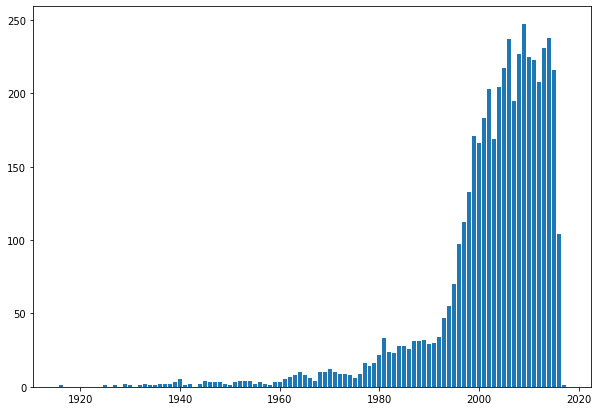

In [131]:
ax = plt.gca()
ax.bar(graph_1['release_date'], graph_1['id'])

In [210]:
# график 2 - Топ стран производителей фильмов, круговая диаграмма. Переменная count - int64
country_dict = {}
for i in unique_country_list:
    country_dict[i] = 0

for i in unique_country_list:
    for j in country_list:
        j = j.split('|')
        if i in j:
            country_dict[i] += 1

x = []
y = []
for country, count in country_dict.items():
    x.append(country)
    y.append(count)
    
new_dict = {}
new_dict['country'] = x
new_dict['count'] = y
s = pd.DataFrame.from_dict(new_dict)
s = s.sort_values(by='count', ascending=False).head(10)
s = s.set_index('country')
s

,count
country,
United States of America,256
United Kingdom,176
France,146
Germany,118
Canada,66
Italy,51
Spain,46
China,29
Japan,28


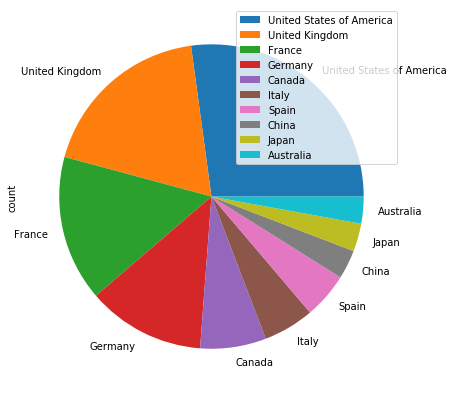

In [158]:
s.plot(kind='pie', y='count')

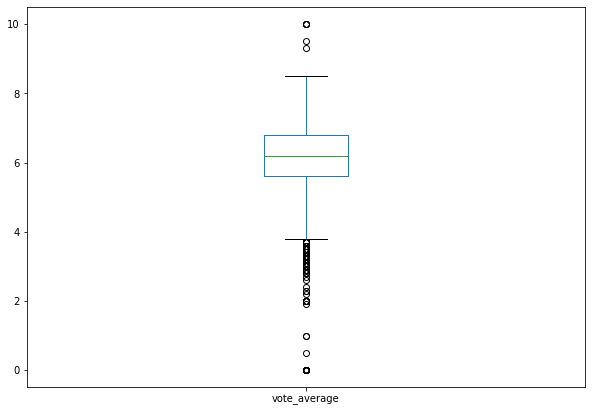

In [145]:
# График 3 - График распредления рейтинга фильмов. Ящик с усами, vote_average - float64

movies['vote_average'].plot(kind='box')

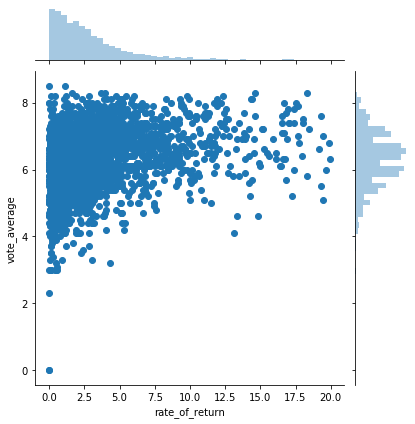

In [169]:
# График 4 - Для того, чтобы посмотреть на взаимосвязь показателя оценки пользователей и рентабельности фильма, 
# использую joint_plot.  rate_of_return - float64, vote_average - float64

movies_sns = movies[ (movies['rate_of_return'] < 20) & (movies['rate_of_return'] > 0)]

sns.jointplot(x='rate_of_return', y='vote_average',
             data=movies_sns, kind='scatter')


In [213]:
movies_sns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3108 entries, 0 to 4798
Data columns (total 21 columns):
budget                  3108 non-null int64
genres                  3108 non-null object
homepage                1290 non-null object
id                      3108 non-null int64
keywords                3108 non-null object
original_language       3108 non-null object
original_title          3108 non-null object
overview                3108 non-null object
popularity              3108 non-null float64
production_companies    3108 non-null object
production_countries    3108 non-null object
release_date            3108 non-null float64
revenue                 3108 non-null int64
runtime                 3108 non-null float64
spoken_languages        3108 non-null object
status                  3108 non-null object
tagline                 2866 non-null object
title                   3108 non-null object
vote_average            3108 non-null float64
vote_count              3108 non-null

In [186]:
# График 5  - Использую heatmap чтобы посмотреть на популярность разных жанров по годам. vote_average - float64, release_date - datetime
def genres_rating(row):
    return pd.Series([row['vote_average'] if i in row['genres'] else np.NaN for i in unique_genres_list])

movies[unique_genres_list] = movies.apply(genres_rating, axis=1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners|Twentieth Century Fox ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures|Danjaq|B24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,Action|Crime|Thriller,NaN,9367,united states–mexico barrier|legs|arms|paper k...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4799,9000,Comedy|Romance,NaN,72766,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,,...,5.9,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4800,0,Comedy|Drama|Romance|TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date|love at first sight|narration|investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,Front Street Pictures|Muse Entertainment Enter...,...,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4801,0,,http://shanghaicalling.com/,126186,,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
temp = movies.iloc[:, 21:]
temp = temp.join(movies.release_date)
temp = temp.groupby(temp.release_date).mean().fillna(0)
temp = temp.drop(['release_date'], axis=1)
temp

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
release_date,,,,,,,,,,,,,,,,,,,,
1916.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1925.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.0,0.0
1927.0,0.000000,0.000000,0.000000,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1929.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.300000,7.600000,0.000000,0.000000,0.000000,0.000000,6.300000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.0,0.0
1930.0,6.100000,0.000000,0.000000,0.000000,0.000000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.100000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013.0,6.044643,6.225000,5.947619,6.259259,6.183784,6.364545,5.926415,6.323529,6.013636,5.900000,6.073239,6.540000,5.208000,6.240000,7.025000,5.766667,6.675000,6.400000,0.0,5.4
2014.0,5.857407,6.335135,6.481250,6.088462,5.762963,5.930909,5.509091,6.078571,6.156522,5.133333,5.945161,6.270833,4.914286,5.440000,6.285714,6.790000,6.244444,3.528571,0.0,0.0
2015.0,5.684783,6.268571,6.420000,5.807143,5.419231,5.993684,5.444776,6.476923,5.900000,5.185714,6.017308,6.352174,4.984848,5.505000,6.566667,7.250000,5.687500,3.542857,0.0,0.0


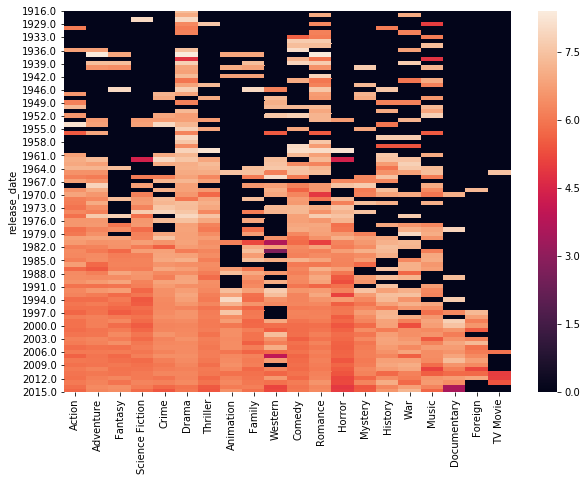

In [209]:
genre_heatmap = sns.heatmap(temp)

In [ ]:
import json

def to_str(column):
    new_str = ''
    genres_list = json.loads(column)
    for i in genres_list:
        new_str += i["name"] + '|'    
    return new_str[:-1]    